In [1]:
import socket
def get_var_by_comp_name(variableName):
    curCompName = socket.gethostname()
    retVal = None
    if variableName == 'khs_dir':
        if curCompName == 'doga-MSISSD':
            base_dir = '/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery'  # for bogazici kasa
        elif curCompName == 'WsUbuntu05' or curCompName == 'wsubuntu':
            base_dir = '/home/wsubuntu/GitHub/keyhandshapediscovery'  # for WS Doga DHO
        elif curCompName == 'doga-msi-ubu':
            base_dir = None  # for laptop
        retVal = base_dir
    if variableName == 'data_path':
        if curCompName == 'doga-MSISSD':
            base_dir = '/mnt/USB_HDD_1TB/Datasets'  # for bogazici kasa
        elif curCompName == 'WsUbuntu05' or curCompName == 'wsubuntu':
            base_dir = '/mnt/SSD_Data/DataPath'  # for WS Doga DHO
        elif curCompName == 'doga-msi-ubu':
            base_dir = None  # for laptop
        retVal = base_dir
    if variableName == 'experiment_path':
        if curCompName == 'doga-MSISSD':
            base_dir = '/mnt/USB_HDD_1TB/GitHub/keyhandshapediscovery/experiments/SPARSE_TORCH'  # for bogazici kasa
        elif curCompName == 'WsUbuntu05' or curCompName == 'wsubuntu':
            base_dir = '/mnt/SSD_Data/vaesae_experiments'  # for WS Doga DHO
        elif curCompName == 'doga-msi-ubu':
            base_dir = None  # for laptop
        retVal = base_dir
        
    print(curCompName + '_' + variableName, '=',  retVal)
    if retVal is None:
        os.error(5)
    return retVal

khs_dir = get_var_by_comp_name('khs_dir')
data_path = get_var_by_comp_name('data_path')
experiment_path = get_var_by_comp_name('experiment_path')

import sys, importlib as impL
import os
sys.path.insert(1,os.path.join(khs_dir, 'vae_torch'))
sys.path.insert(1,khs_dir)
import vae_torch_model as vtm
import vae_torch as vt
#from data_classes import khs_dataset_v2
import vae_scripts as vs
import sae_torch as st
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import vae_utils as vu

experiments_folder=os.path.join(experiment_path, 'FM')
exp_base_name='exp_conv_ae_simple_is28_cf'
ae_f_name_base='ae_ft_conv_ae_simple_is28.npy'
loss_key_list = ['bottleneck_act', 'bottleneck_kmeans', 'sparsity', 'reconstruction']
data_log_keys = ['tr_te', 'te']

wsubuntu_khs_dir = /home/wsubuntu/GitHub/keyhandshapediscovery
wsubuntu_data_path = /mnt/SSD_Data/DataPath
wsubuntu_experiment_path = /mnt/SSD_Data/vaesae_experiments


454 ,  tr_te  - log is loaded with len:  200
454_tr_te_bottleneck_act  [44.525, 44.335, 44.47833333333333] 
max(45.45),min(24.81)
color_id: 0 , color_float: 0.05 , rgba: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
455 ,  tr_te  - log is loaded with len:  200
455_tr_te_bottleneck_act  [35.906666666666666, 36.805, 35.36666666666667] 
max(48.85),min(32.45)
color_id: 1 , color_float: 0.15 , rgba: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
458 ,  tr_te  - log is loaded with len:  200
458_tr_te_bottleneck_act  [45.163333333333334, 43.85, 42.80833333333333] 
max(52.66),min(37.55)
color_id: 2 , color_float: 0.25 , rgba: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
459 ,  tr_te  - log is loaded with len:  200
459_tr_te_bottleneck_act  [44.74166666666667, 45.08166666666666, 40.94166666666667] 
max(50.78),min(32.10)
color_id: 3 , color_float: 0.35 , rgba: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
460 ,  tr_te  - log 

454 ,  te  - log is loaded with len:  200
454_te_sparsity  [31.41083221635199, 31.120682226173813, 31.16502739067073] 
max(140.62),min(0.00)
color_id: 0 , color_float: 0.05 , rgba: (0.12156862745098039, 0.4666666666666667, 0.7058823529411765, 1.0)
455 ,  te  - log is loaded with len:  200
455_te_sparsity  [1389.974822755903, 1383.3221555687487, 1382.639391347766] 
max(5680.22),min(0.00)
color_id: 1 , color_float: 0.15 , rgba: (1.0, 0.4980392156862745, 0.054901960784313725, 1.0)
458 ,  te  - log is loaded with len:  200
458_te_sparsity  [1315.6738269608468, 1308.4883349947631, 1311.2446893937886] 
max(3723.21),min(1300.64)
color_id: 2 , color_float: 0.25 , rgba: (0.17254901960784313, 0.6274509803921569, 0.17254901960784313, 1.0)
459 ,  te  - log is loaded with len:  200
459_te_sparsity  [216.43100073561072, 215.96140548354015, 216.19893150636926] 
max(3835.01),min(69.91)
color_id: 3 , color_float: 0.35 , rgba: (0.8392156862745098, 0.15294117647058825, 0.1568627450980392, 1.0)
460 ,  te 

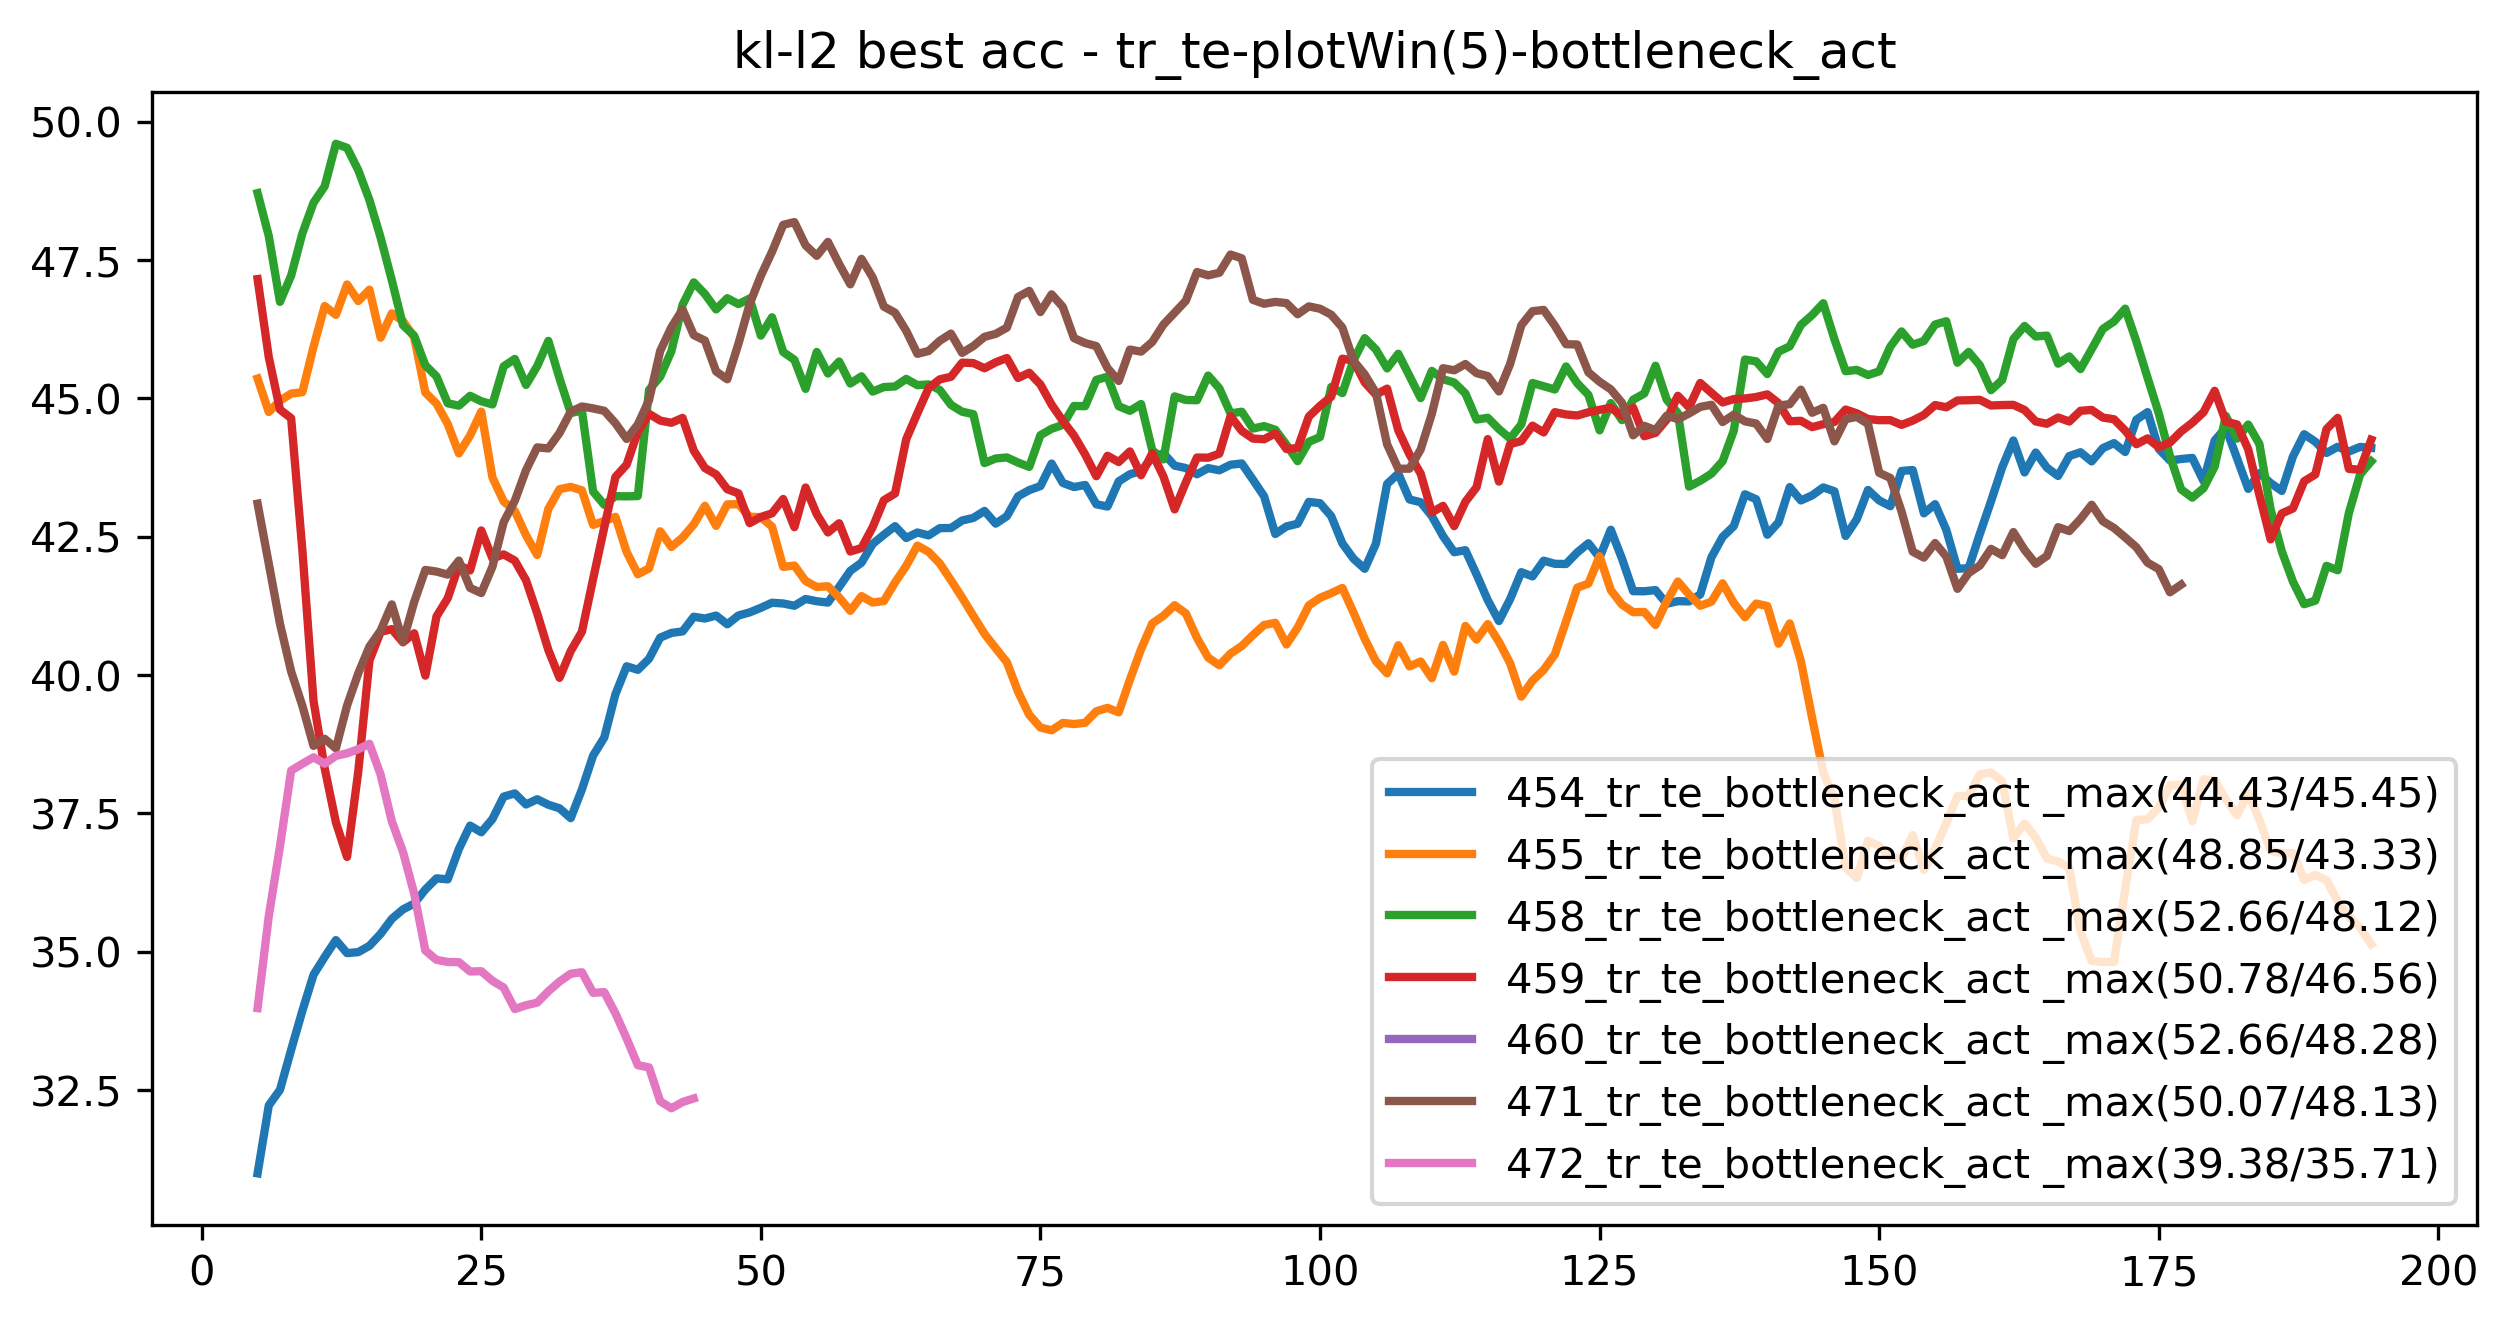

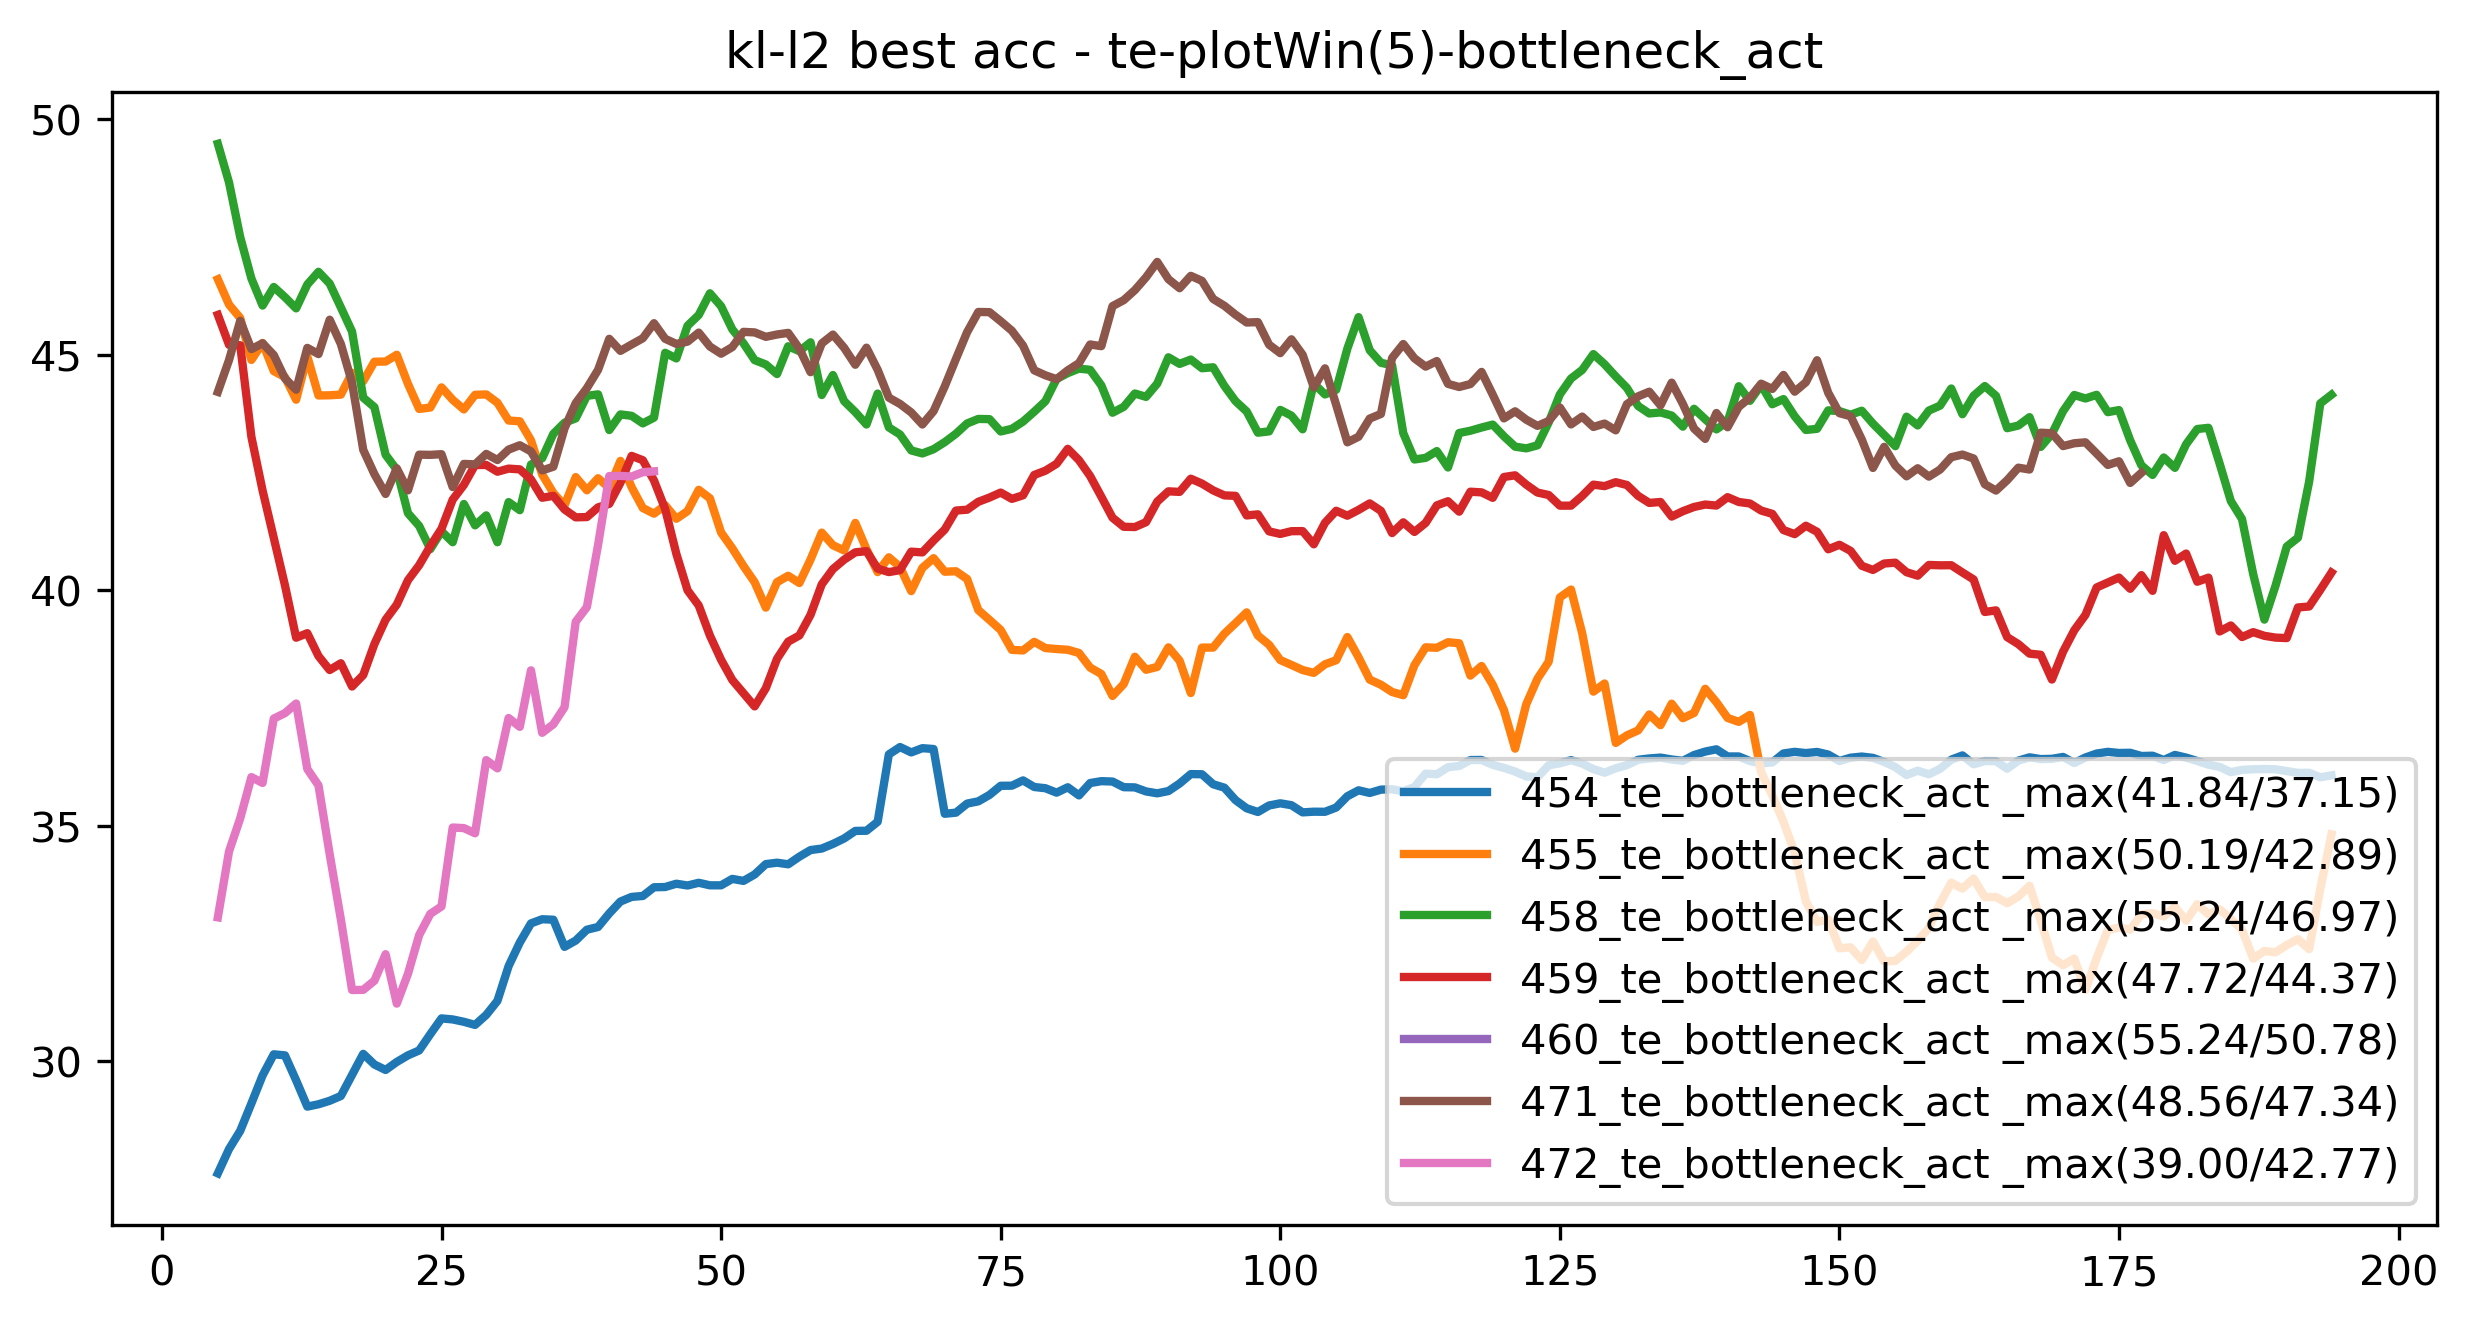

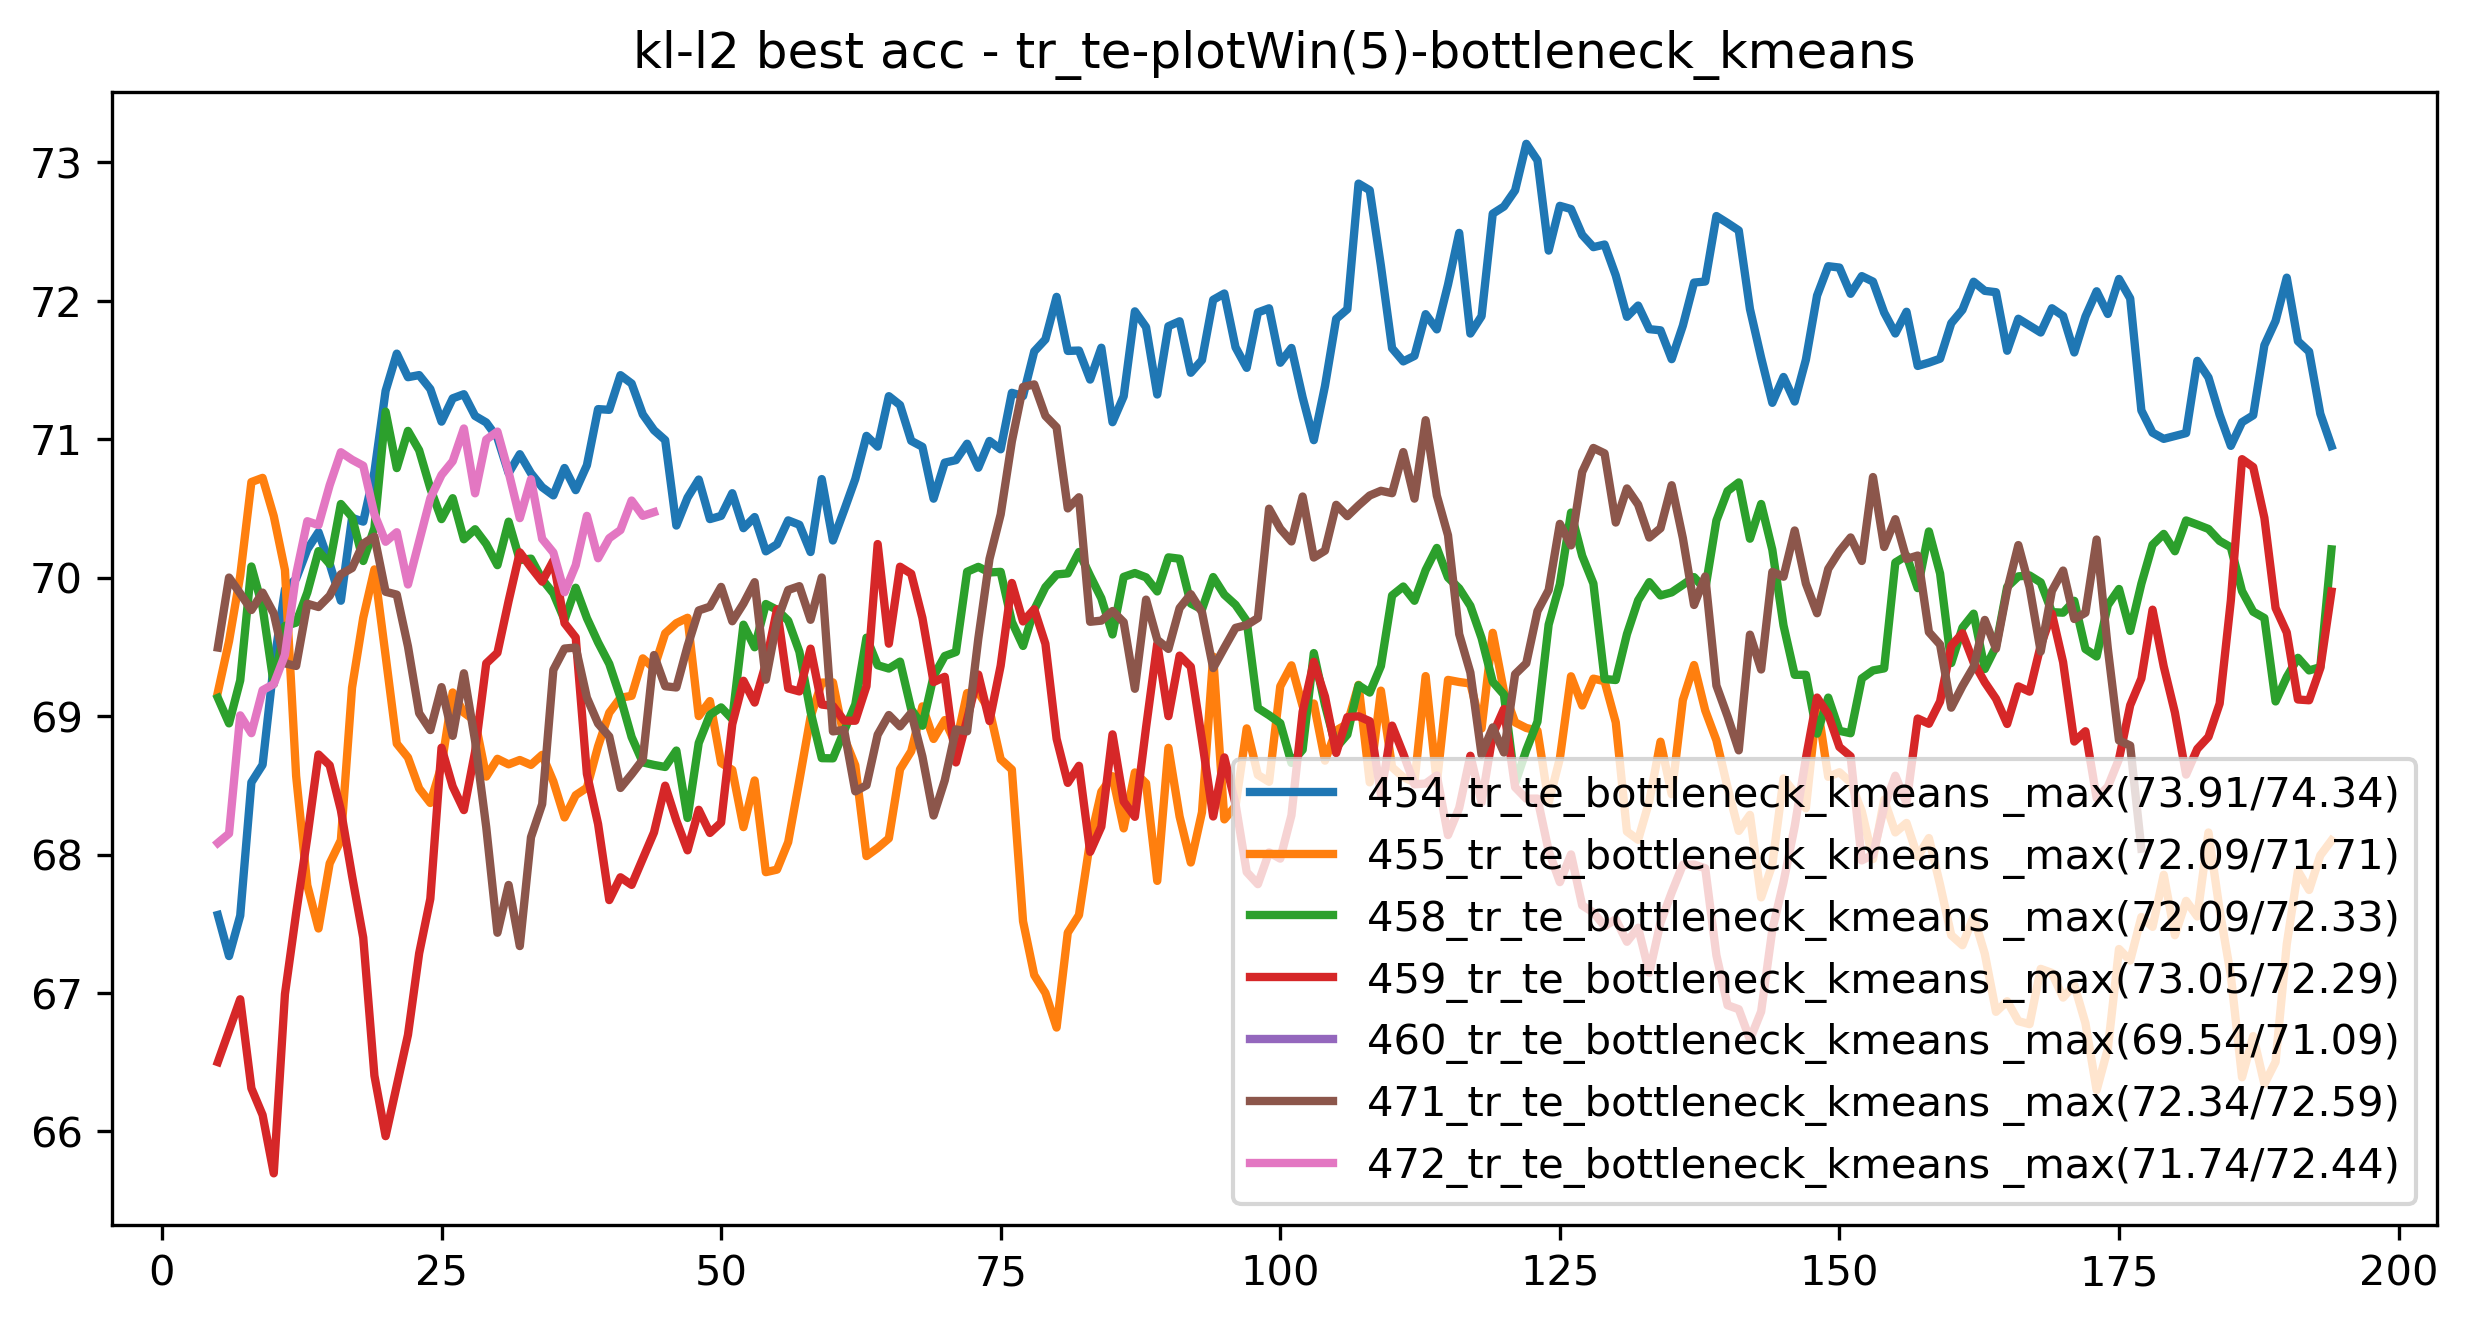

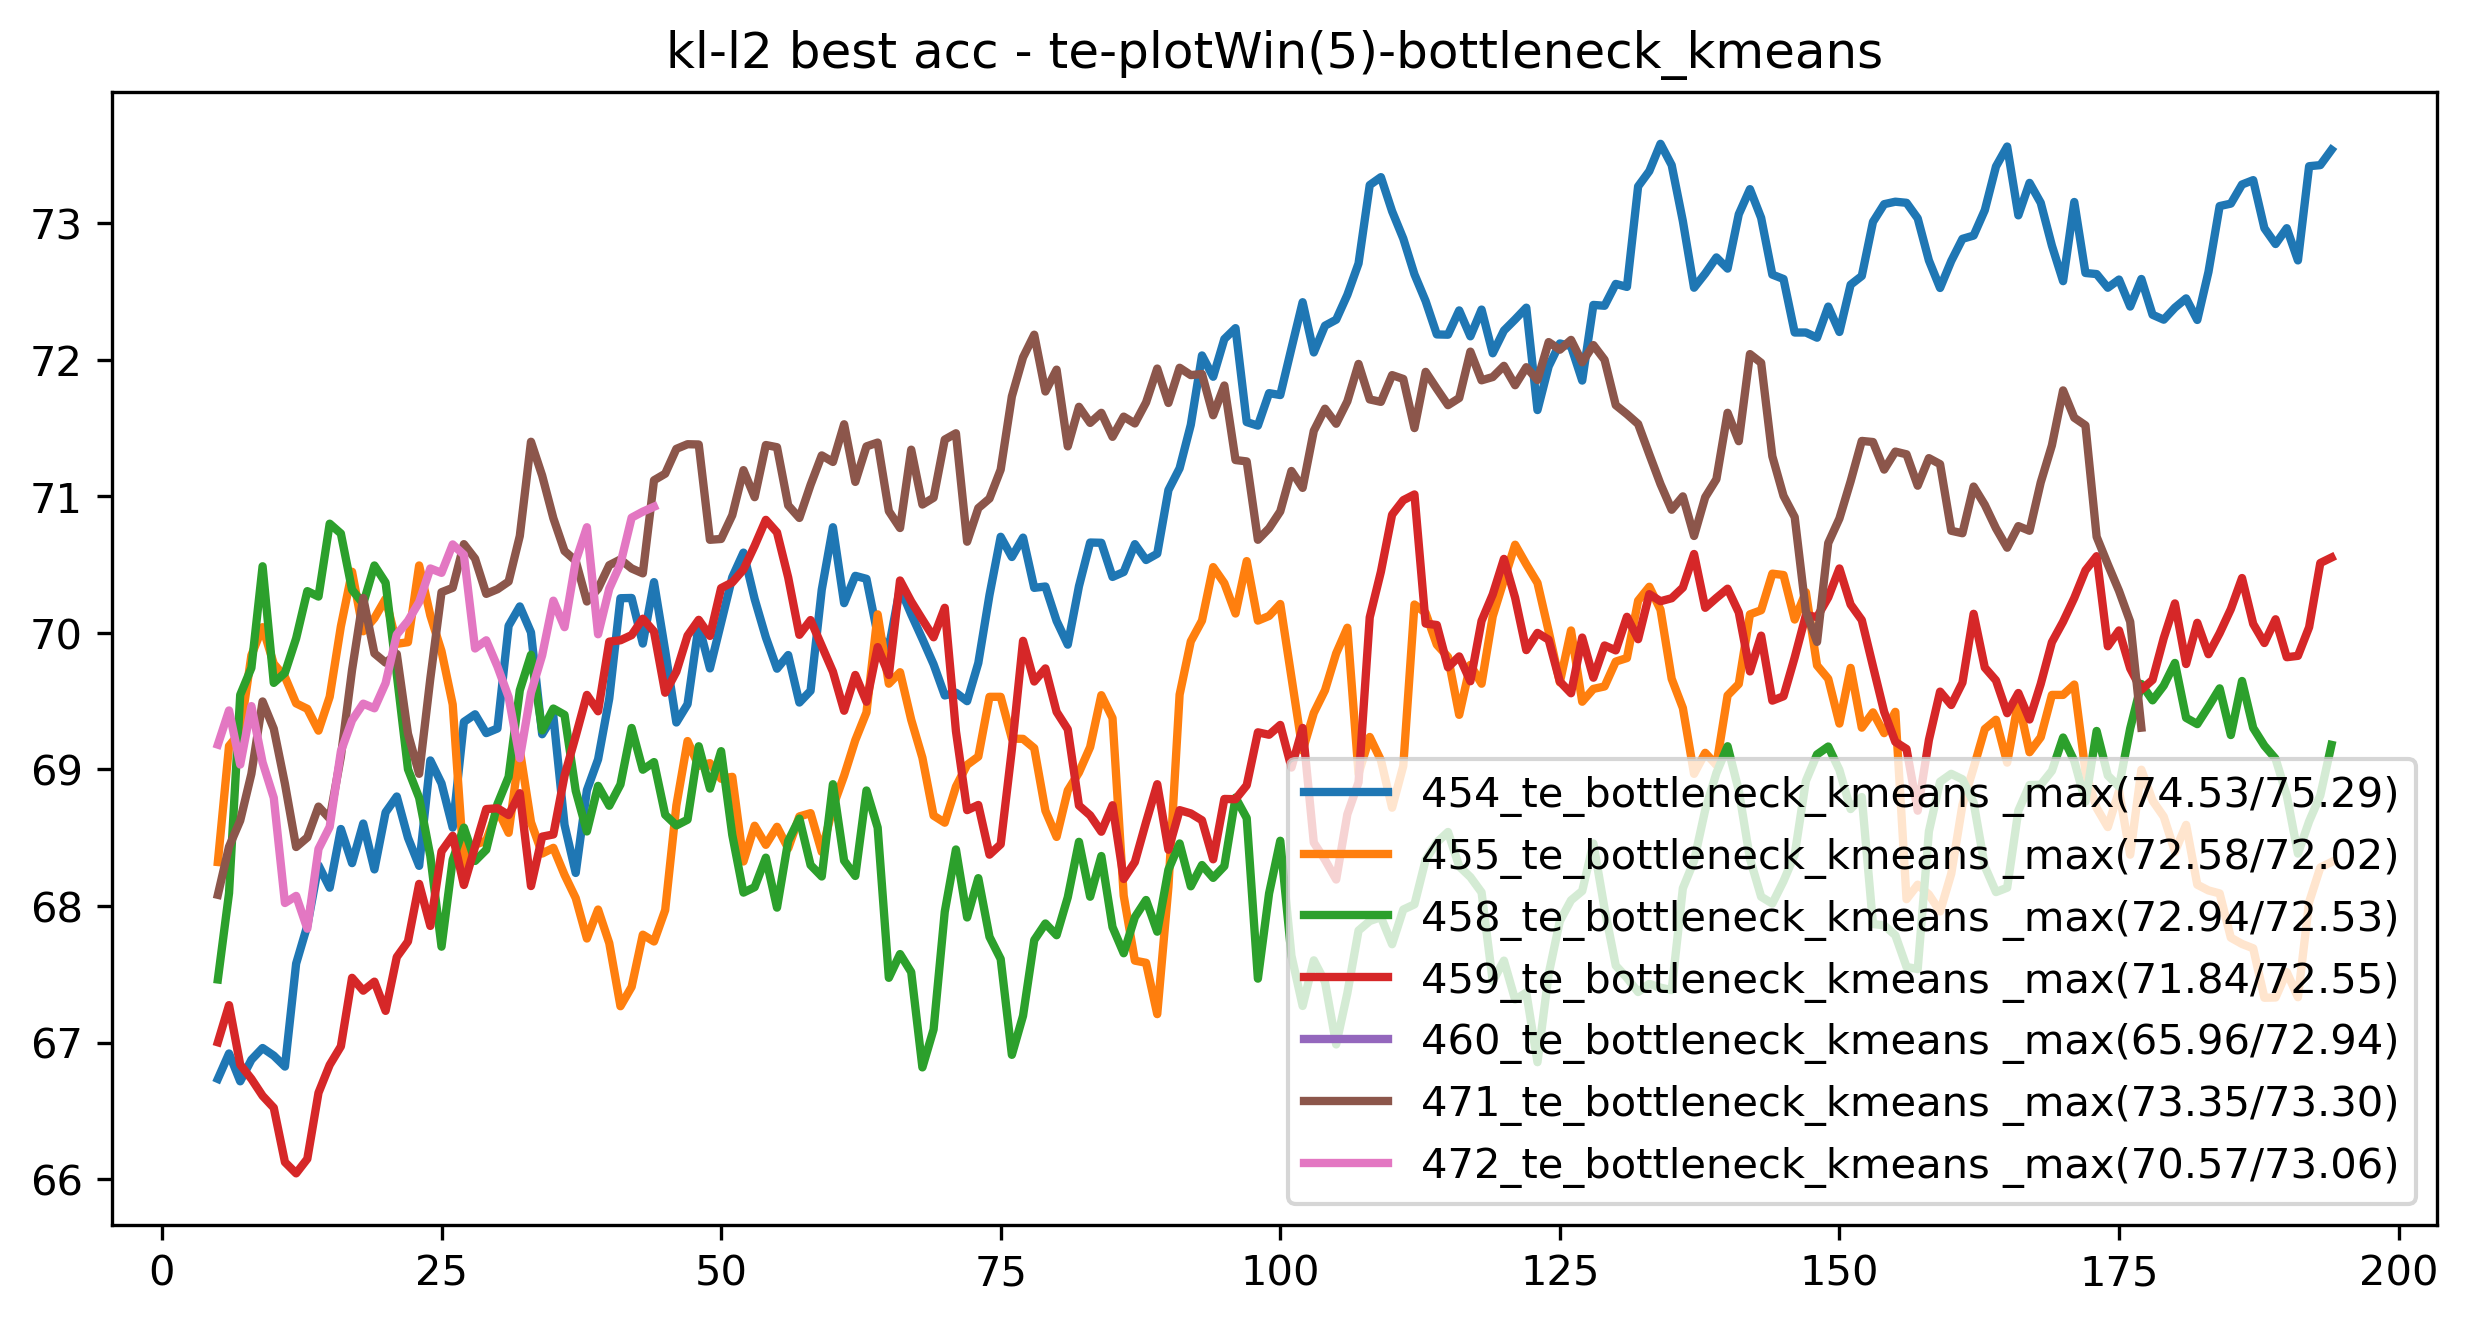

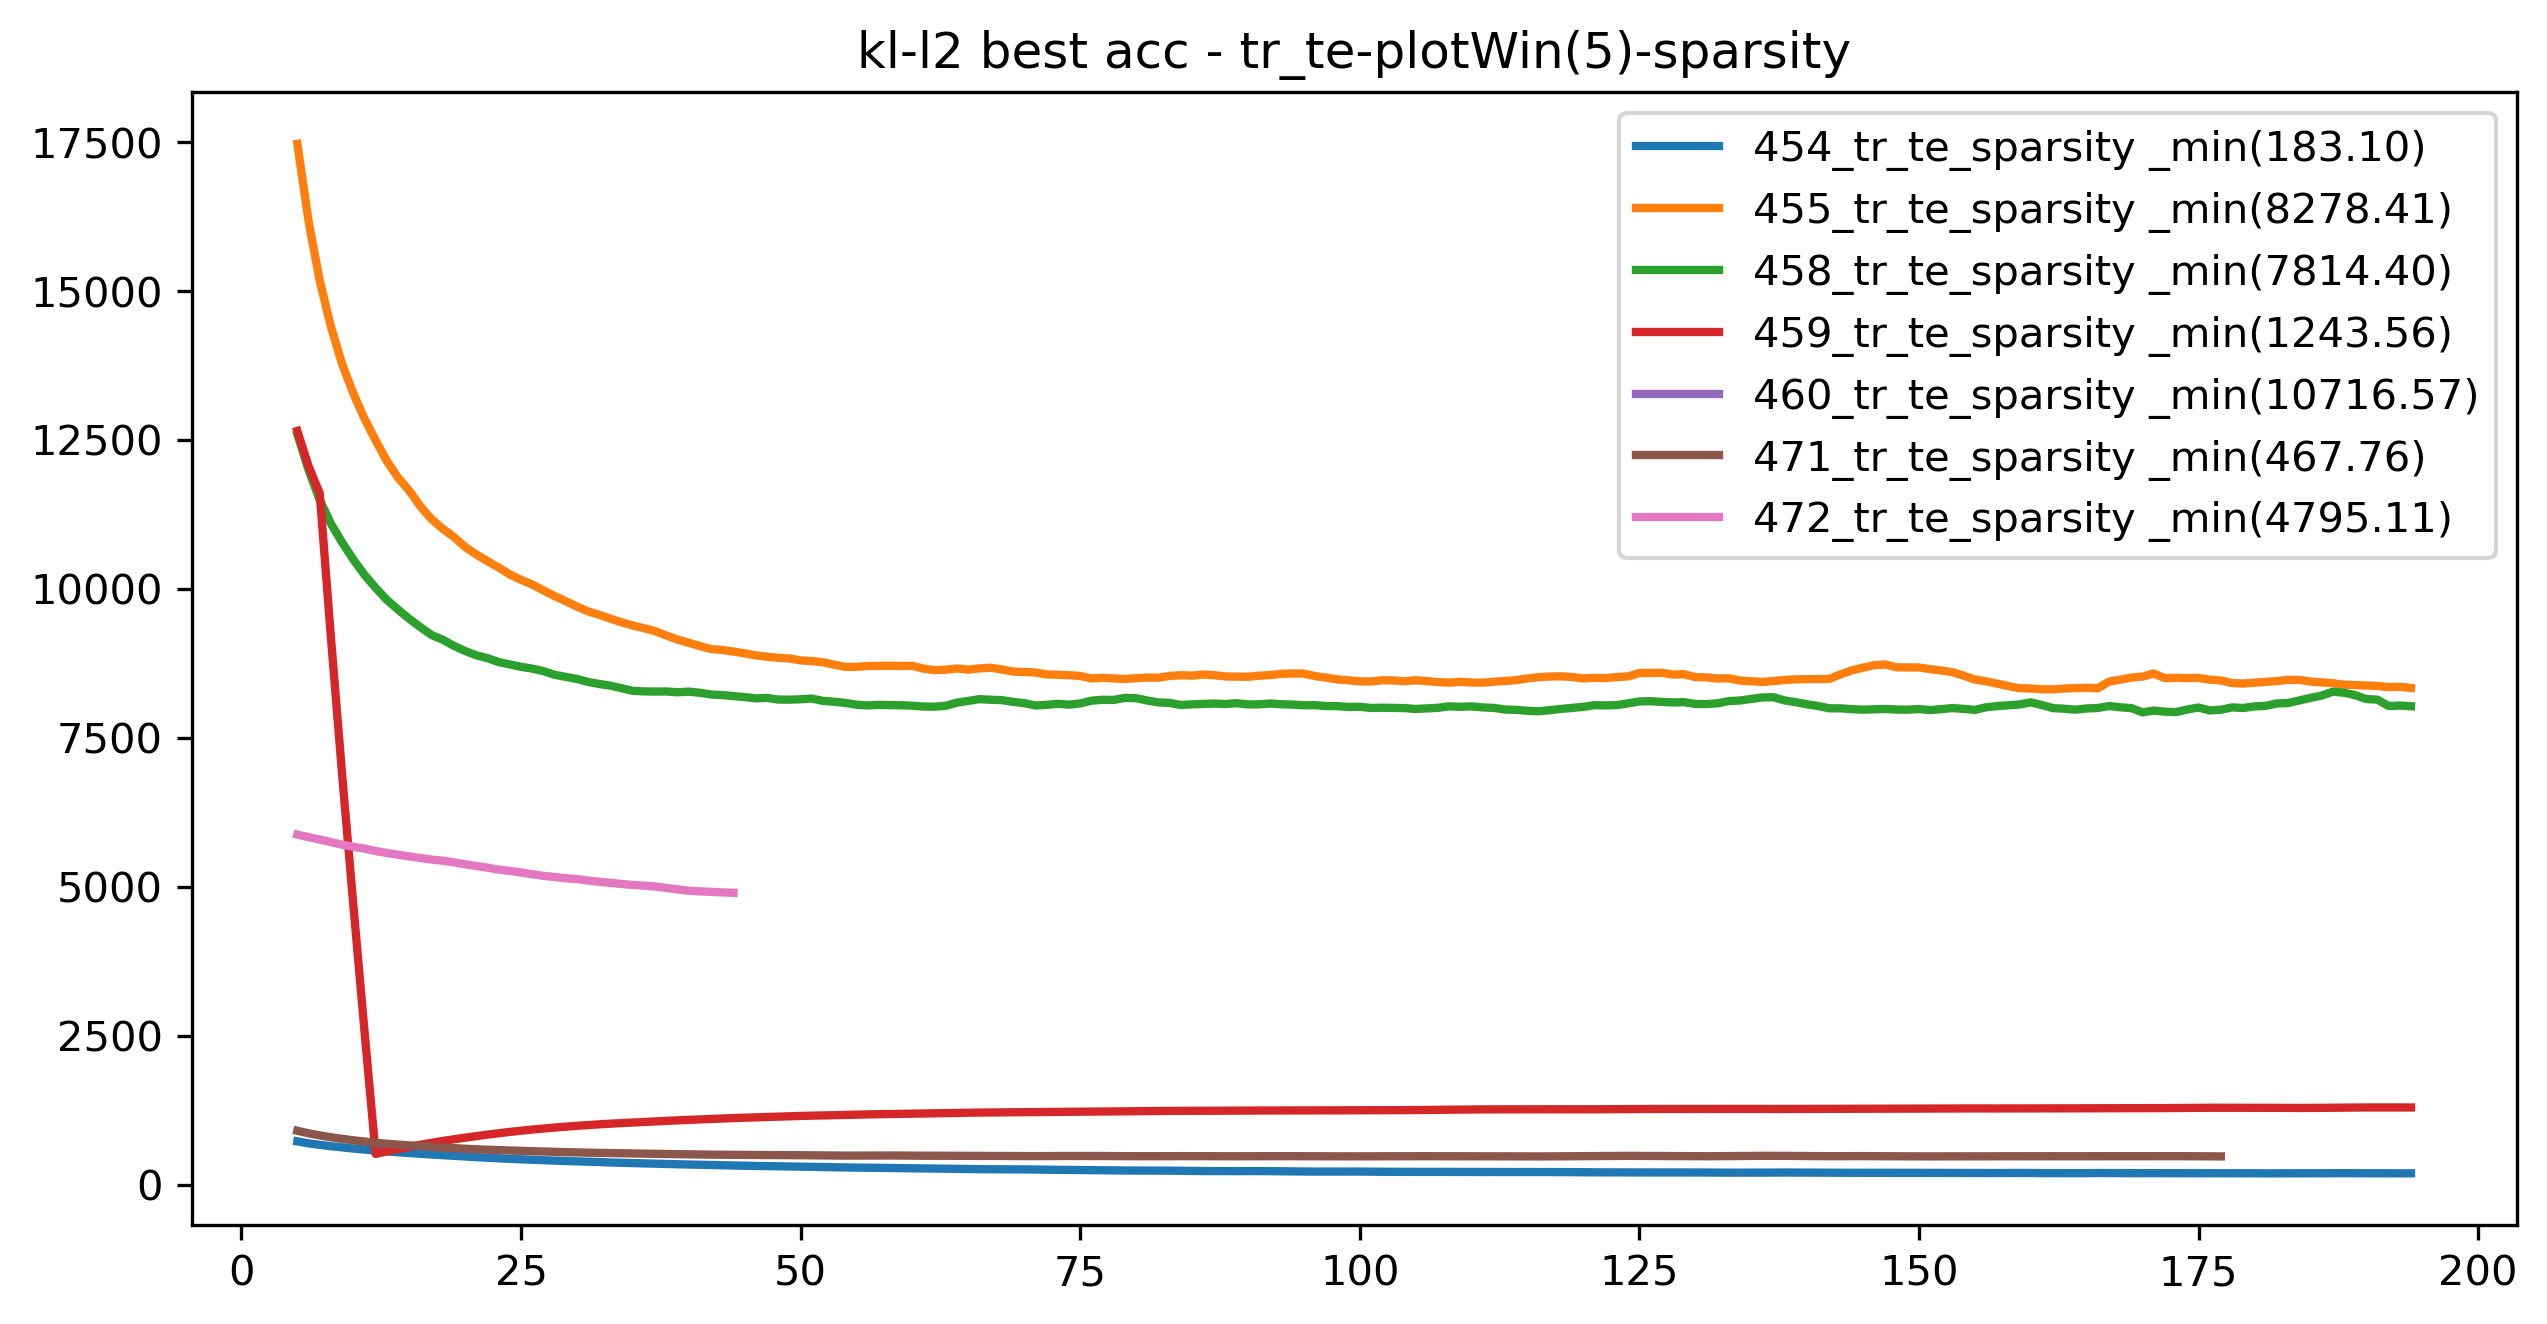

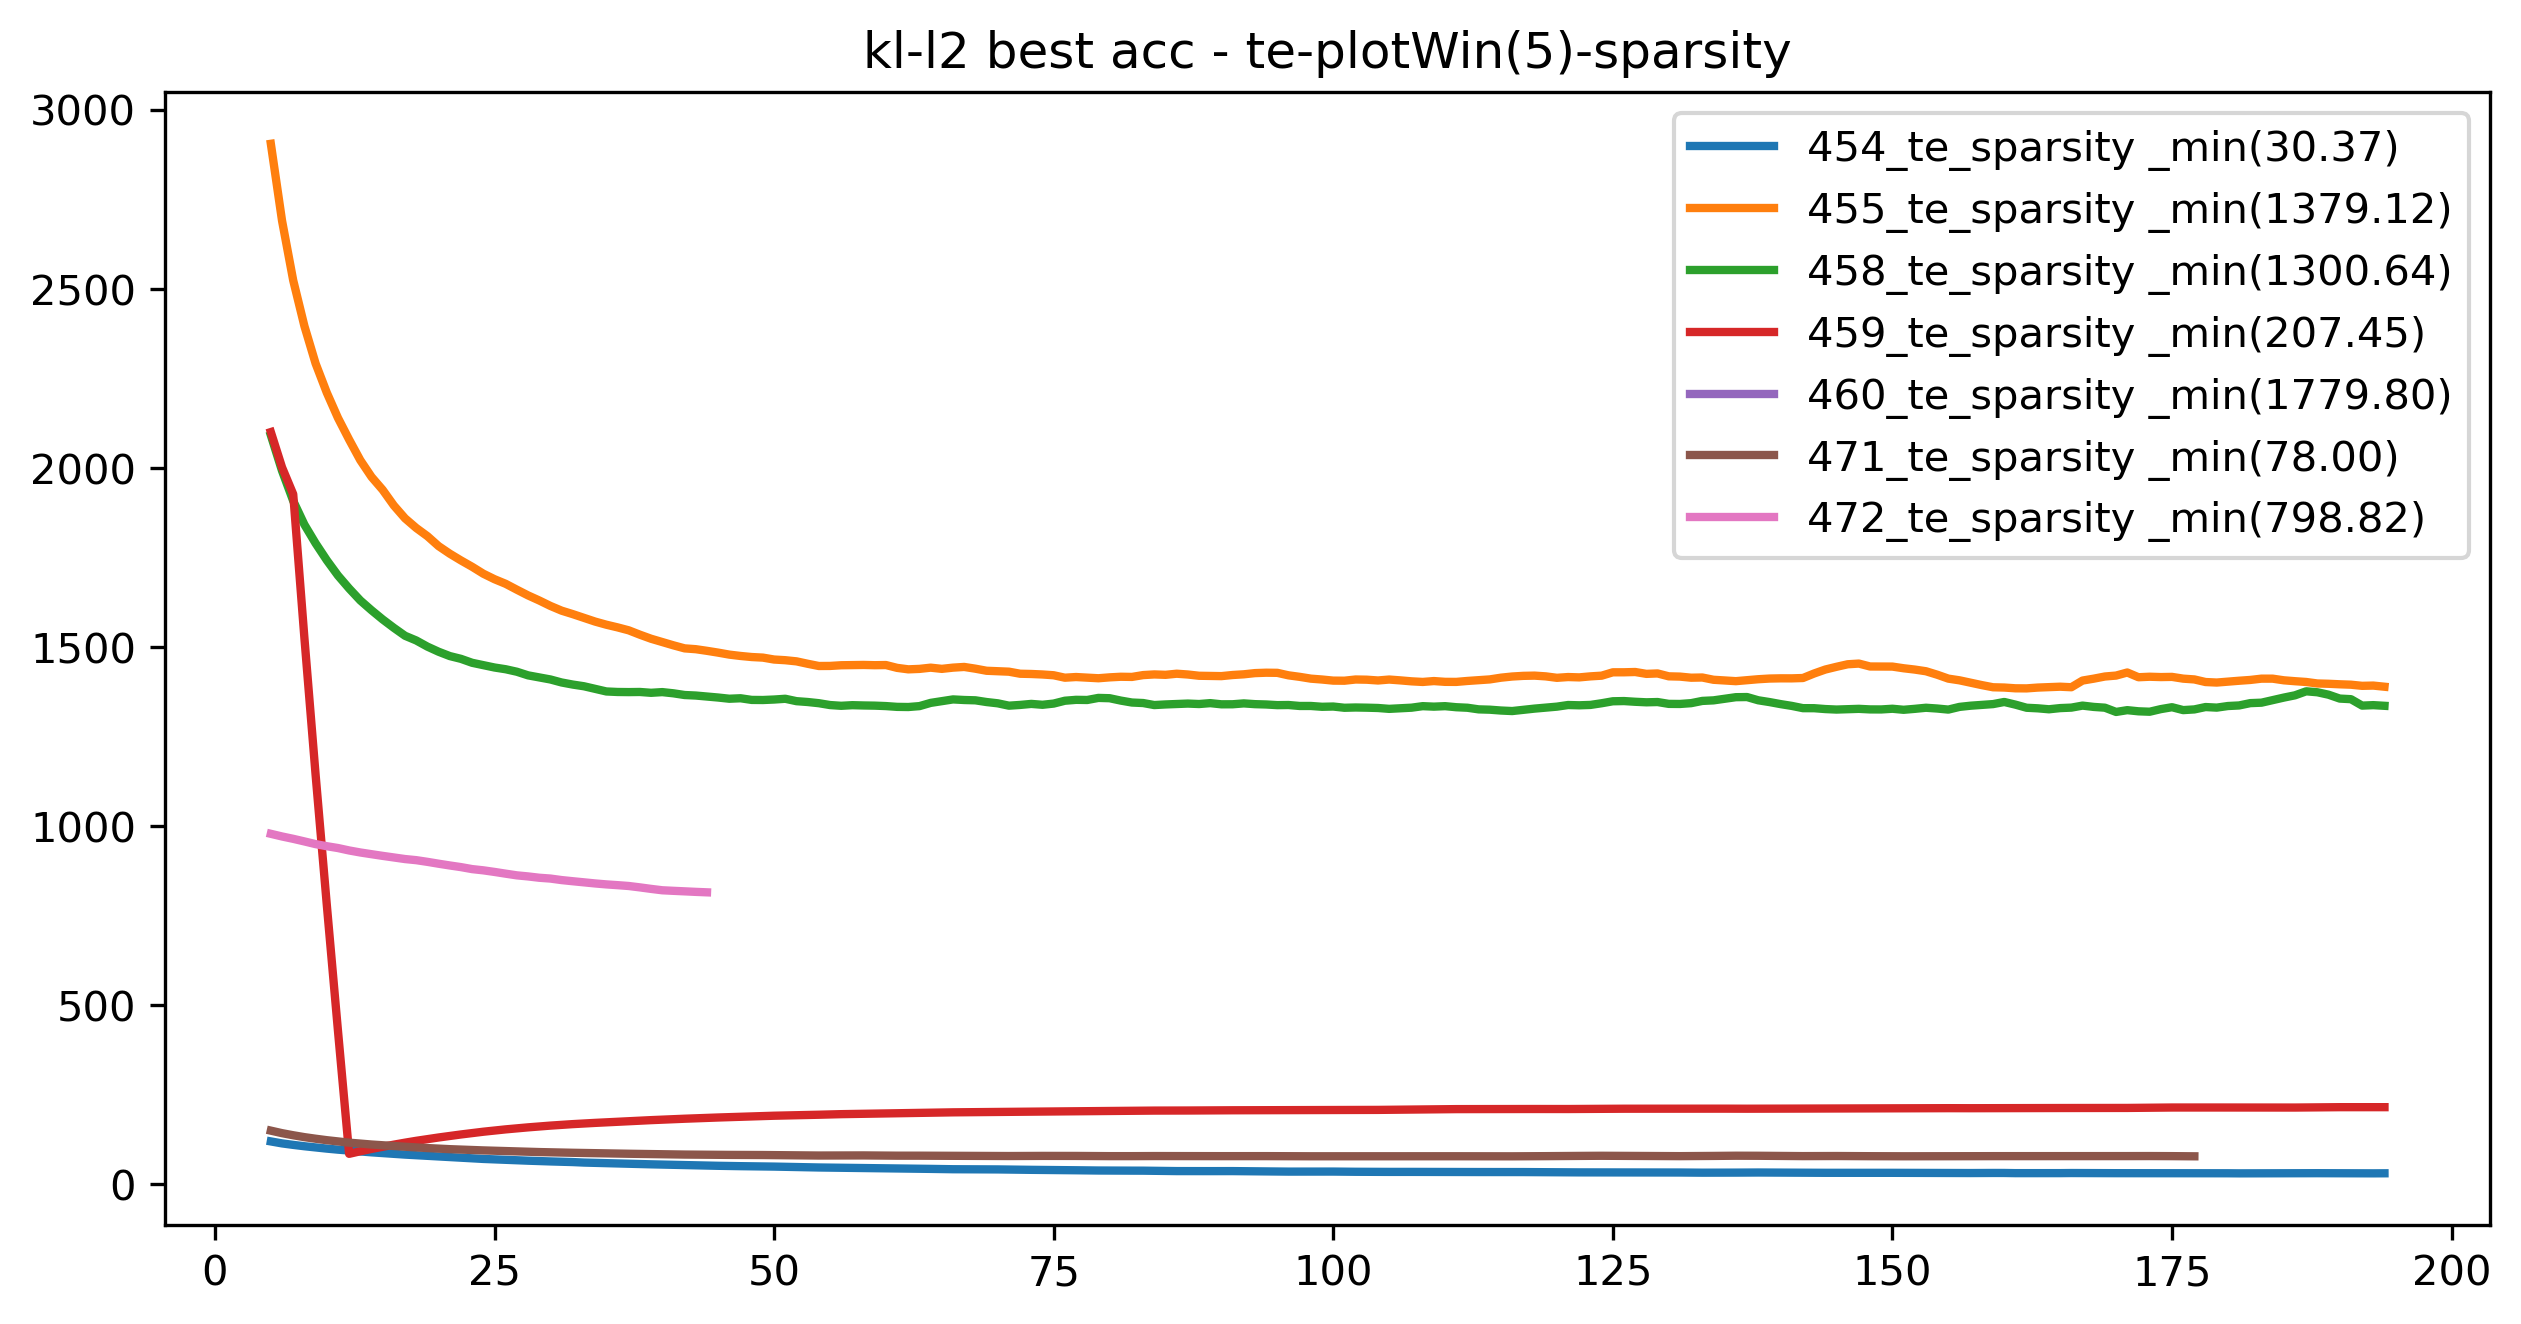

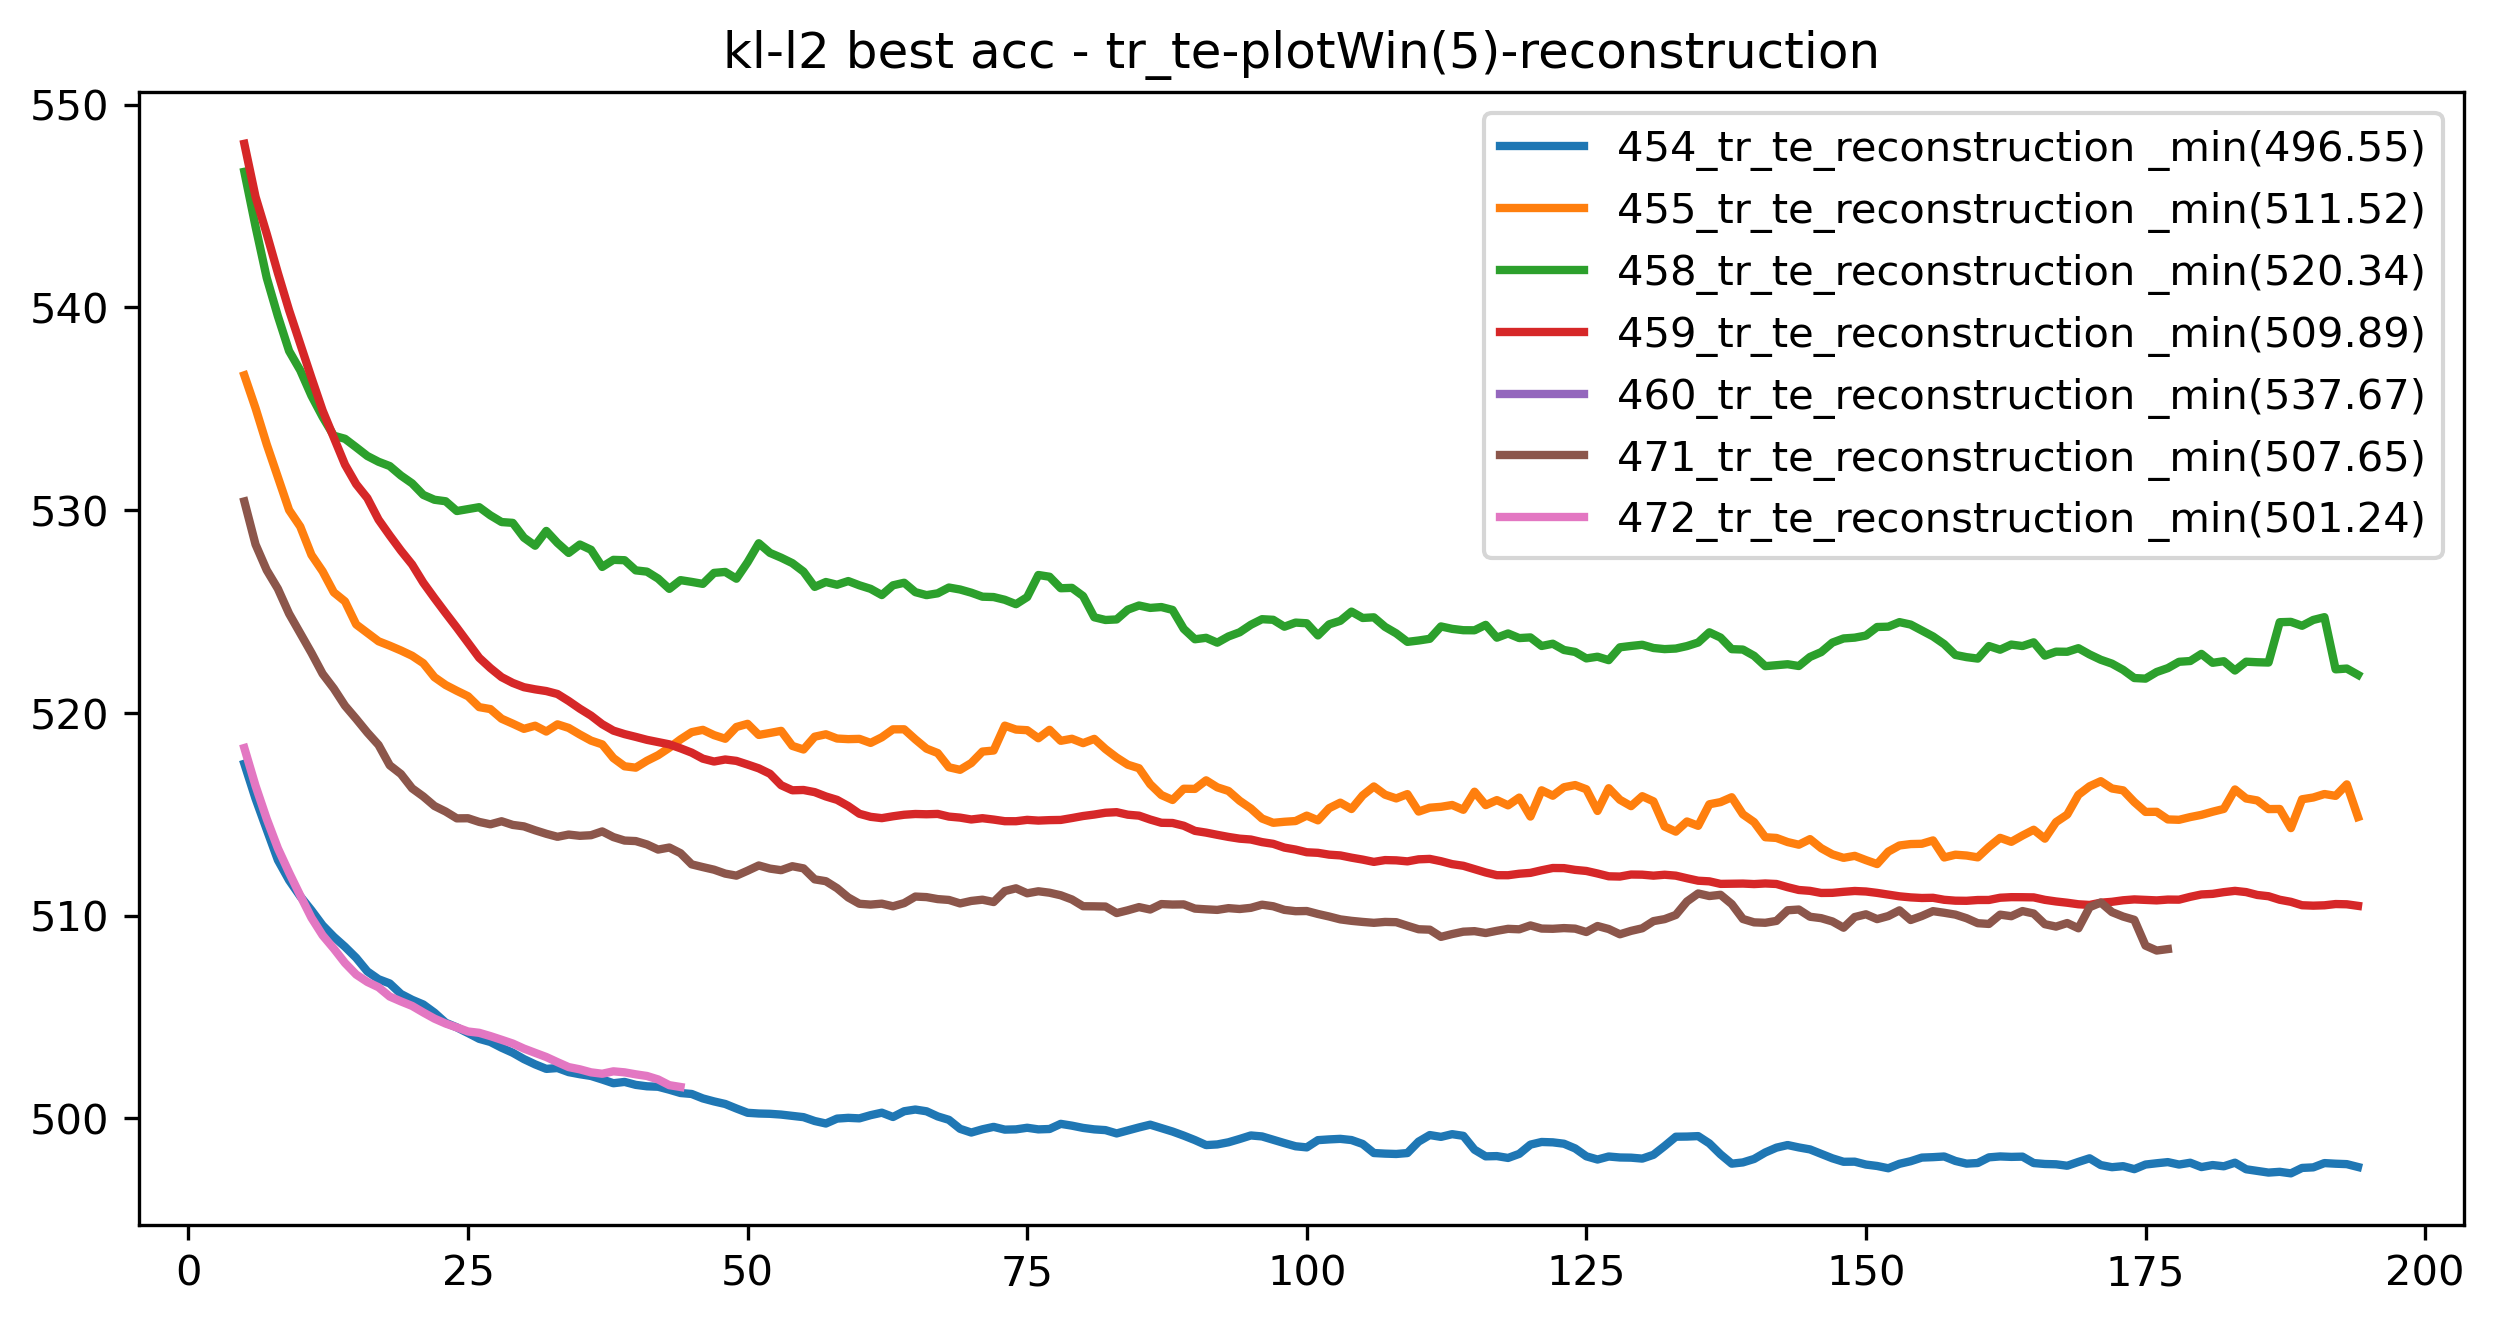

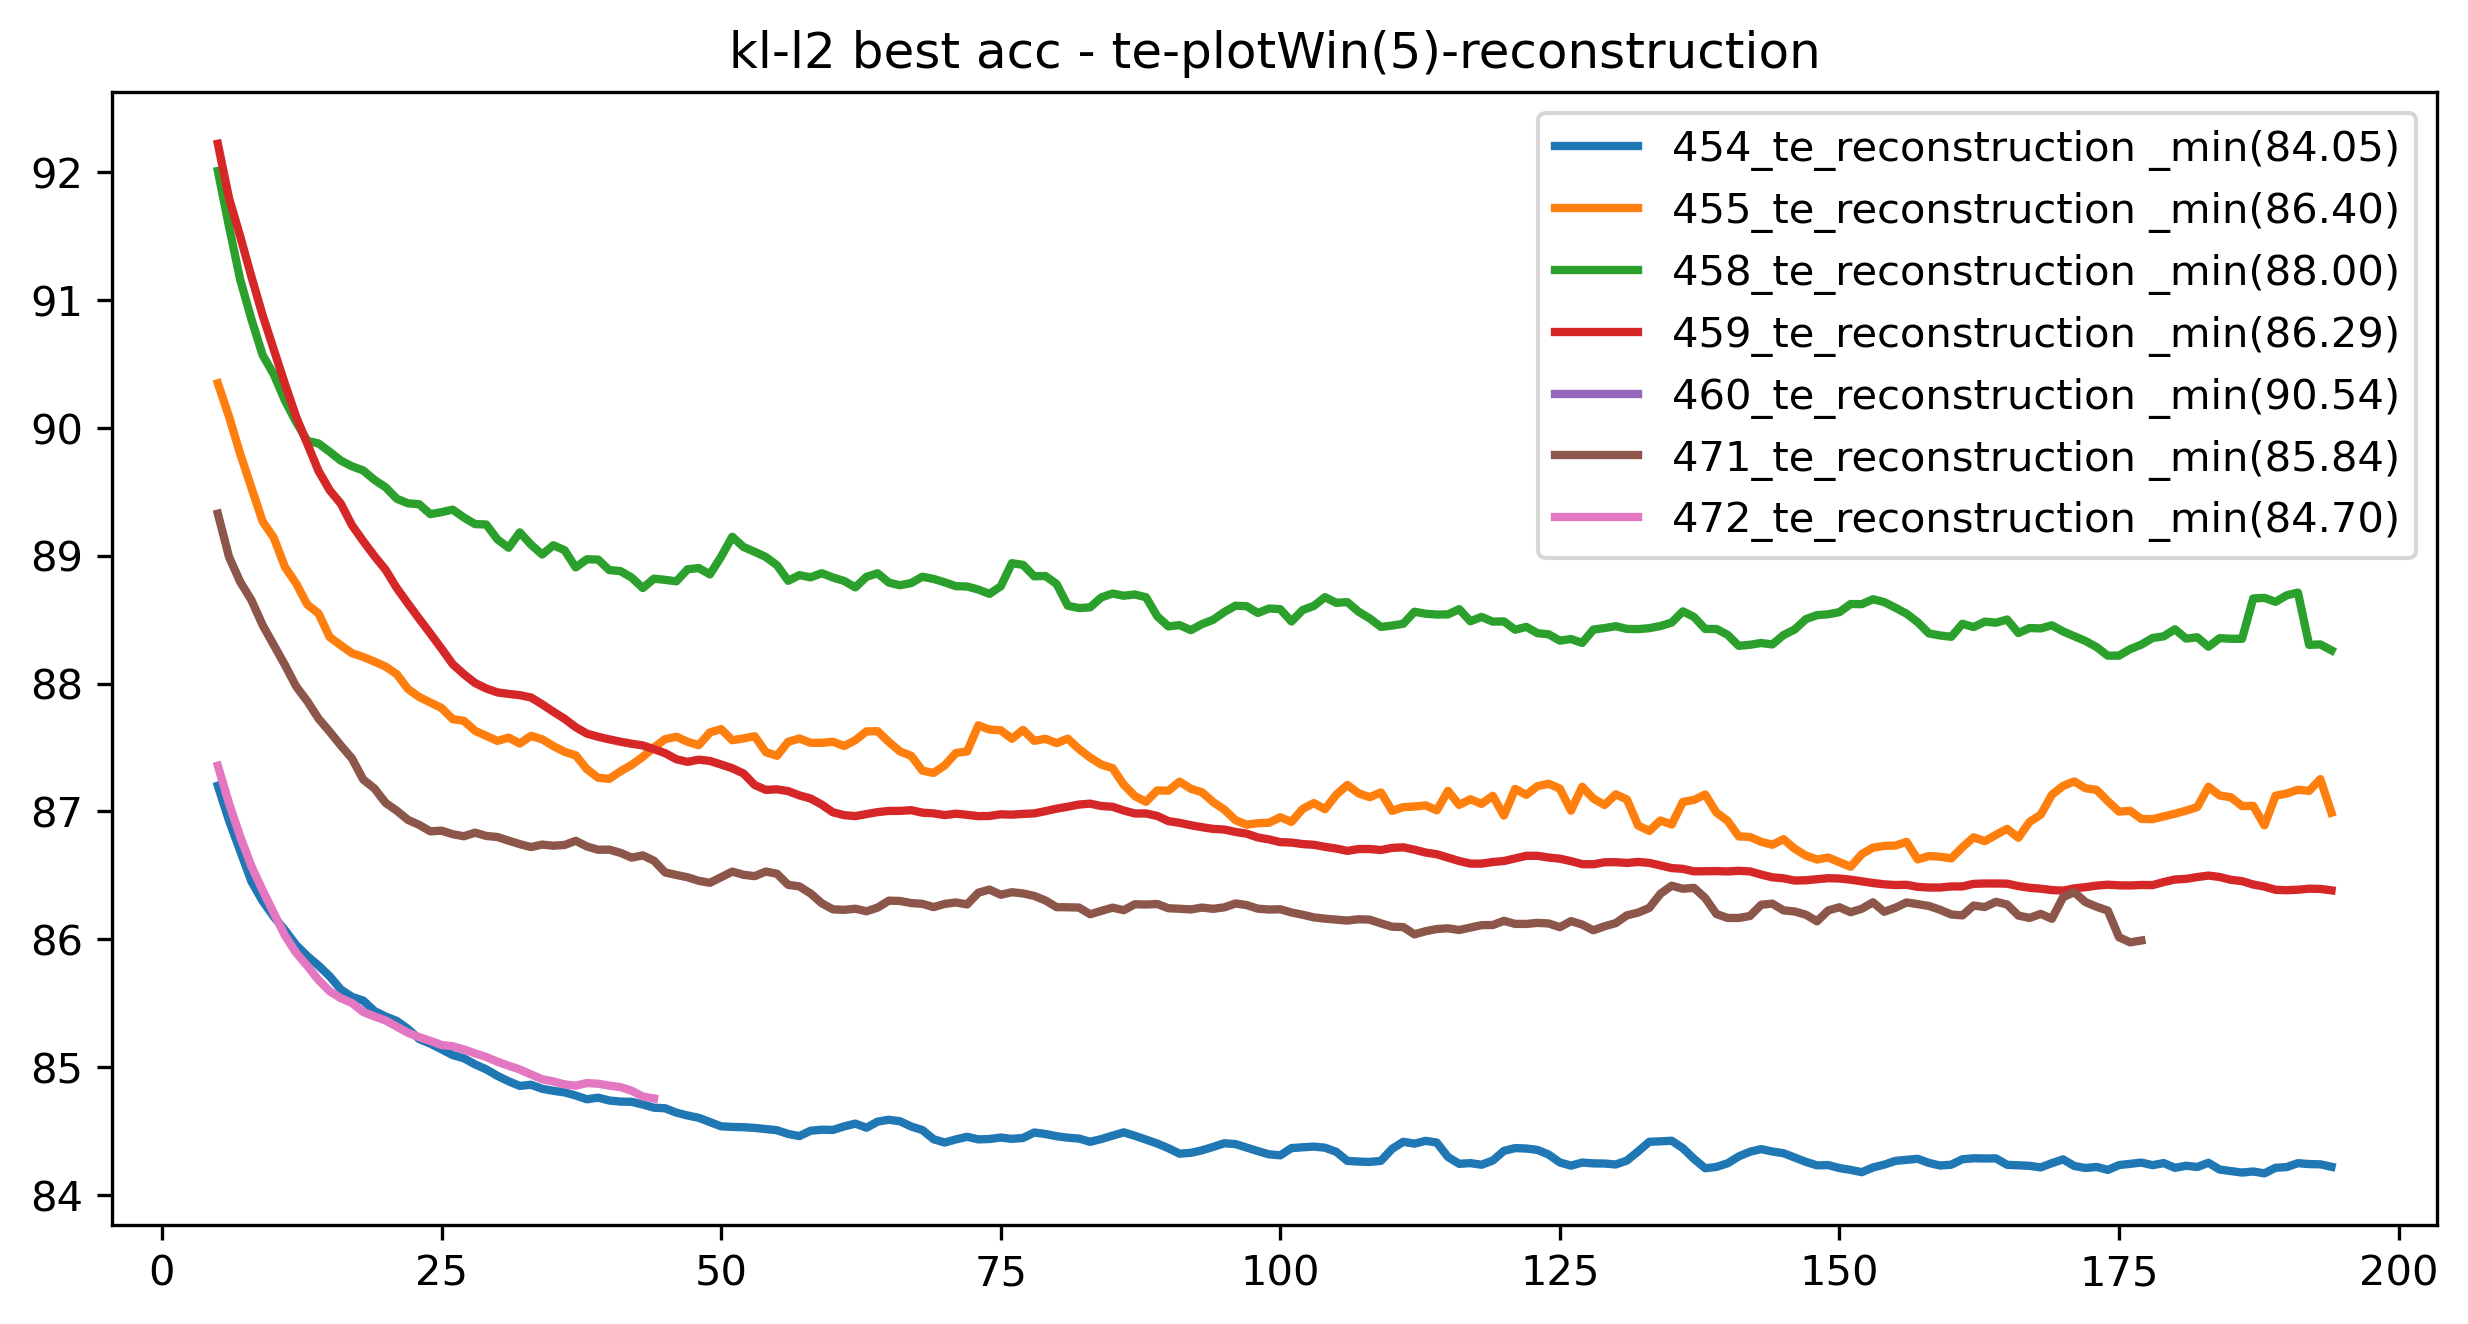

In [28]:
impL.reload(vu)
cf_int_arr=np.array([454,455,458,459,460,471,472])
title_add_front_str = 'kl-l2 best acc - '
max_act_ep = None
plot_average_win_size = 5
save_to_fold=os.path.join(experiments_folder,'kl_l2')
vu.plot_cf_compare_list(cf_int_arr, data_log_keys, loss_key_list, title_add_front_str, 
                        experiments_folder, exp_base_name, ae_f_name_base, max_act_ep=max_act_ep,
                        save_to_fold=save_to_fold, plot_average_win_size=plot_average_win_size)

In [ ]:
impL.reload(vu)
cf_int_arr=np.array([455,456,457,458])
title_add_front_str = 'l2_norm-'
save_to_fold=os.path.join(experiments_folder,'l2_norm')
vu.plot_cf_compare_list(cf_int_arr, data_log_keys, loss_key_list, title_add_front_str, 
                        experiments_folder, exp_base_name, ae_f_name_base,
                        save_to_fold=save_to_fold)

In [ ]:
impL.reload(vu)
cf_int_arr=np.array([451,452, 453, 454])
title_add_front_str = 'kl_divergence and vae - '
save_to_fold=os.path.join(experiments_folder,'kl_vae')
vu.plot_cf_compare_list(cf_int_arr, data_log_keys, loss_key_list, title_add_front_str, 
                        experiments_folder, exp_base_name, ae_f_name_base,
                        save_to_fold=save_to_fold)

In [ ]:
import importlib as impL
impL.reload(vu)
vu.plot_cf(cf_int=458, data_log_keys = ['tr_te','te'], k_loss_disp_list=['sparsity','bottleneck_act'], 
           max_act_ep=None,select_id_type='last',
           plot_cnt = 5,                   
           experiments_folder=experiments_folder,
           exp_base_name=exp_base_name, ae_f_name_base=ae_f_name_base)